<aside>
💡 Question-1:

Given preorder of a binary tree, calculate its **[depth(or height)](https://www.geeksforgeeks.org/write-a-c-program-to-find-the-maximum-depth-or-height-of-a-tree/)** [starting from depth 0]. The preorder is given as a string with two possible characters.

1. ‘l’ denotes the leaf
2. ‘n’ denotes internal node

The given tree can be seen as a full binary tree where every node has 0 or two children. The two children of a node can ‘n’ or ‘l’ or mix of both.

**Examples :**

Input  : nlnll
Output : 2
Explanation :

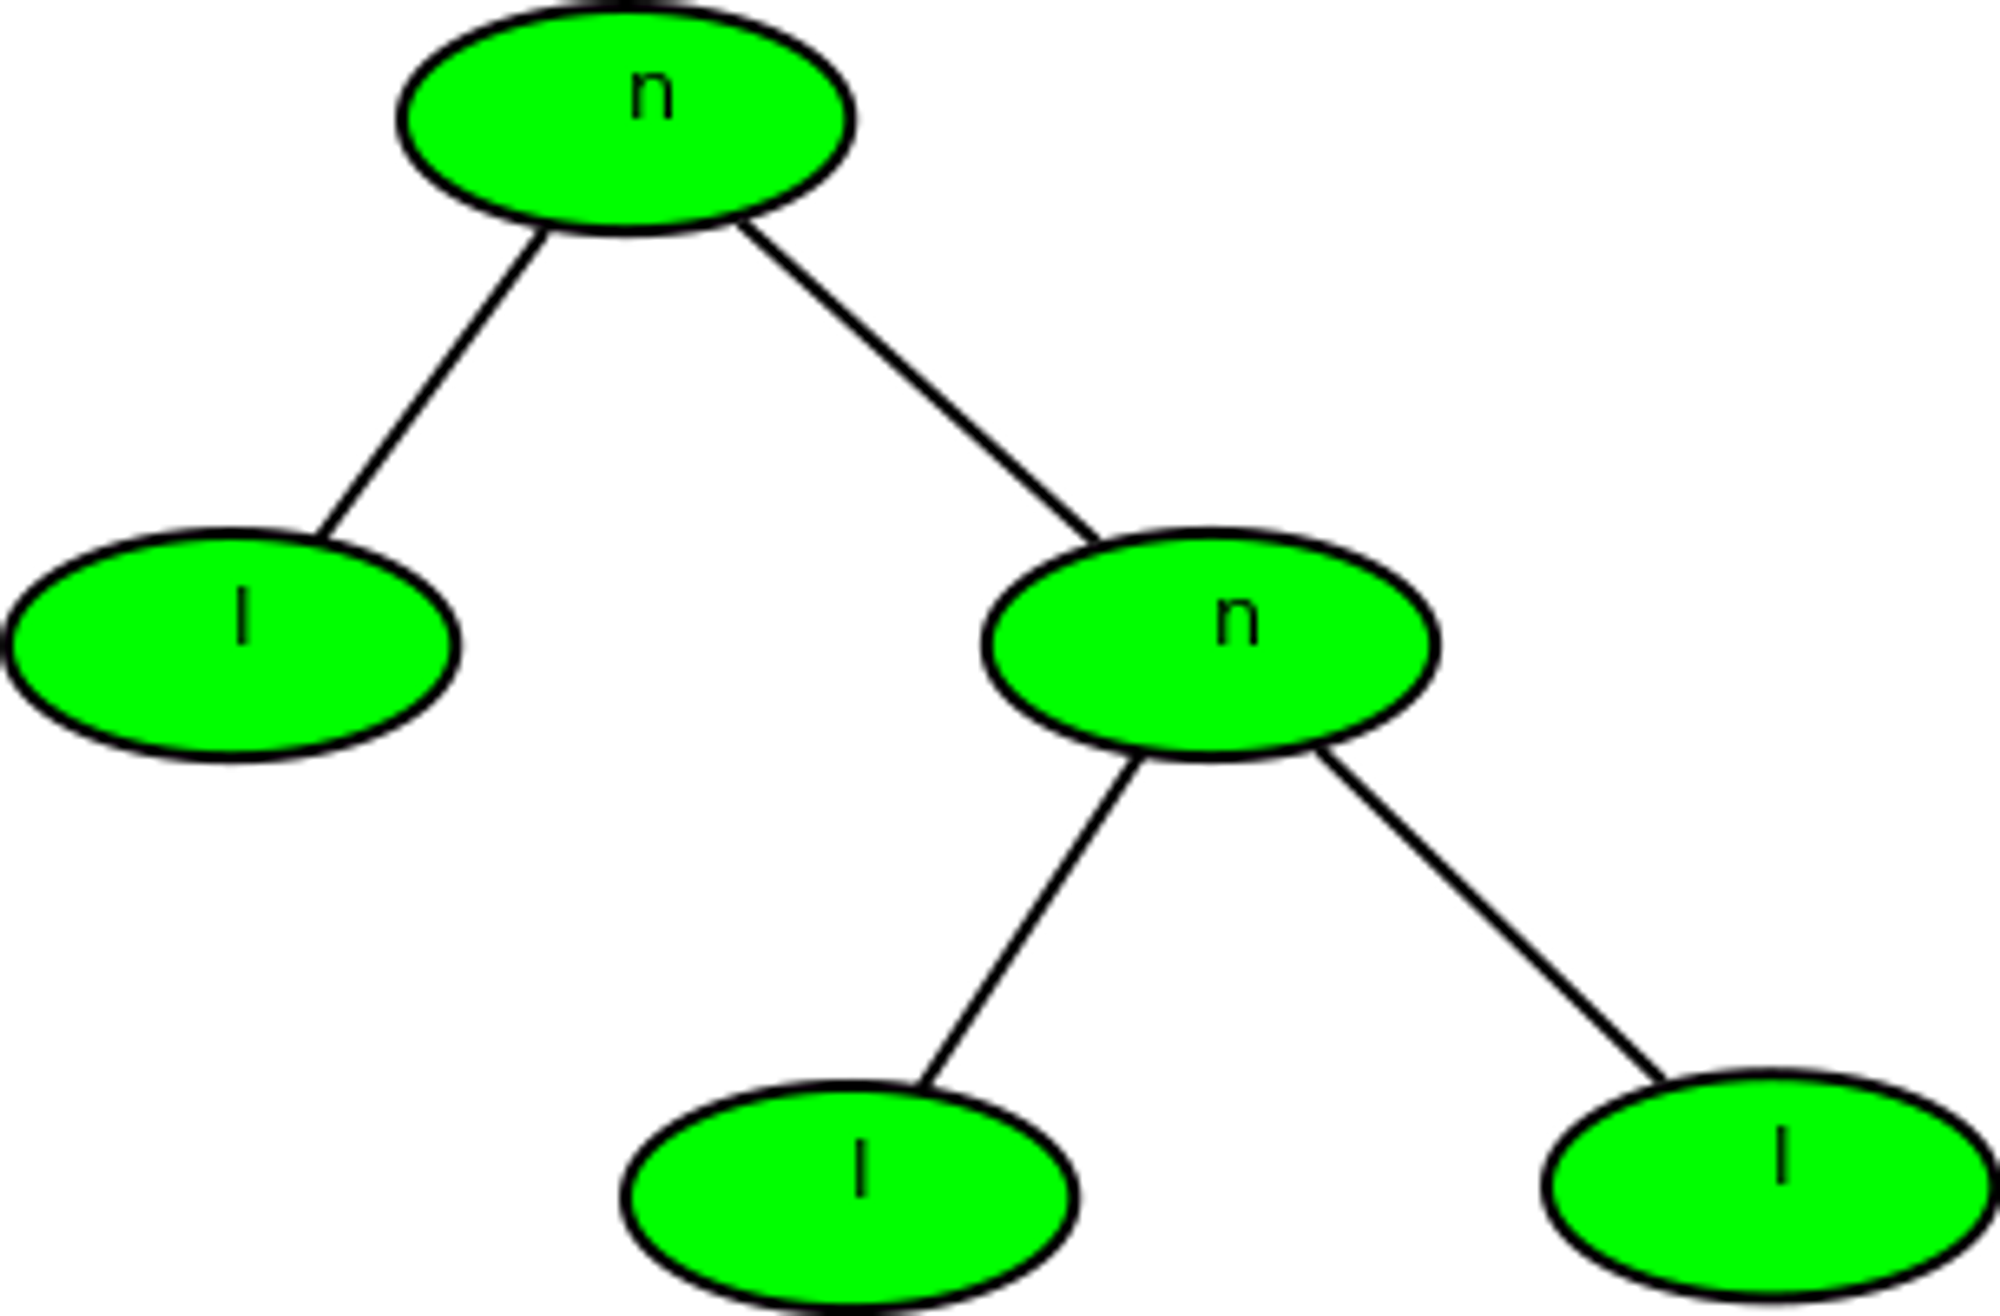

Input  : nlnnlll
Output : 3

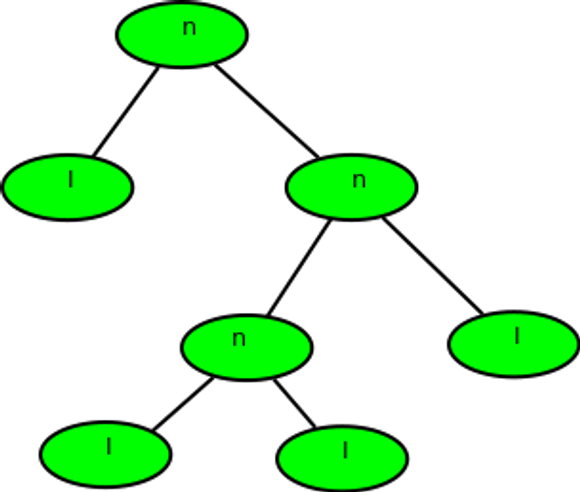
    
    
</aside>

In [5]:
# function definition
def findDepthRec(tree, n, index) :
 
    if (index[0] >= n or tree[index[0]] == 'l'):
        return 0
 
    # calc height of left subtree (In preorder
    # left subtree is processed before right)
    index[0] += 1
    left = findDepthRec(tree, n, index)
 
    # calc height of right subtree
    index[0] += 1
    right = findDepthRec(tree, n, index)
    return (max(left, right) + 1)
 
# Wrapper over findDepthRec()
def findDepth(tree, n) :
 
    index = [0]
    return findDepthRec(tree, n, index)
 
         
# Driver code
tree1 = "nlnll"
n1 = len(tree2)
print(findDepth(tree1, n1))

tree2= "nlnnlll"
n2 = len(tree2)
print(findDepth(tree2, n2))



2
3


<aside>
💡 Question-2:

Given a Binary tree, the task is to print the **left view** of the Binary Tree. The left view of a Binary Tree is a set of leftmost nodes for every level.

**Examples:**

***Input:***

            4

          /   \

        5     2

             /   \

            3     1

           /  \

          6    7

***Output:** 4 5 3 6*

**Explanation:**

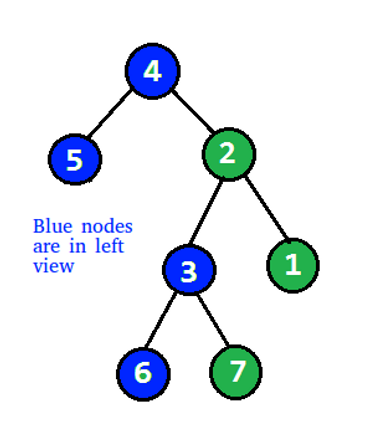
    
    ***Input:***

                    1

                  /   \

                2       3

                 \

                   4

                     \

                        5

                           \

                             6

**Output:** 1 2 4 5 6
</aside>

In [2]:
from collections import deque

# function definition
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def print_left_view(root):
    if not root:
        return

    queue = deque([root])
    left_view = []

    while queue:
        level_size = len(queue)

        for i in range(level_size):
            node = queue.popleft()

            if i == 0:
                left_view.append(node.val)

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

    print(*left_view)

# driver code
# Example usage
root1 = TreeNode(4)
root1.left = TreeNode(5)
root1.right = TreeNode(2)
root1.right.left = TreeNode(3)
root1.right.right = TreeNode(1)
root1.right.left.left = TreeNode(6)
root1.right.left.right = TreeNode(7)

print_left_view(root1)
# Output: 4 5 3 6

root2 = TreeNode(1)
root2.left = TreeNode(2)
root2.right = TreeNode(3)
root2.left.right = TreeNode(4)
root2.left.right.right = TreeNode(5)
root2.left.right.right.right = TreeNode(6)

print_left_view(root2)
# Output: 1 2 4 5 6


4 5 3 6
1 2 4 5 6


<aside>
💡 Question-3:

Given a Binary Tree, print the Right view of it.

The right view of a Binary Tree is a set of nodes visible when the tree is visited from the Right side.

**Examples:**

**Input:**

         1

      /     \

   2         3

/   \       /  \

4     5   6    7

             \

               8

**Output**: 

Right view of the tree is 1 3 7 8

**Input:**

         1

       /

    8

  /

7

**Output**: 

Right view of the tree is 1 8 7

</aside>

In [3]:
from collections import deque

# function definition
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def print_right_view(root):
    if not root:
        return

    queue = deque([root])
    right_view = []

    while queue:
        level_size = len(queue)

        for i in range(level_size):
            node = queue.popleft()

            if i == level_size - 1:
                right_view.append(node.val)

            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

    print(*right_view)


# driver code
# Example usage
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(3)
root1.left.left = TreeNode(4)
root1.left.right = TreeNode(5)
root1.right.left = TreeNode(6)
root1.right.right = TreeNode(7)
root1.right.left.right = TreeNode(8)

print_right_view(root1)
# Output: 1 3 7 8

root2 = TreeNode(1)
root2.left = TreeNode(8)
root2.left.left = TreeNode(7)

print_right_view(root2)
# Output: 1 8 7


1 3 7 8
1 8 7


<aside>
💡 Question-4:

Given a Binary Tree, The task is to print the **bottom view** from left to right. A node **x** is there in output if x is the bottommost node at its horizontal distance. The horizontal distance of the left child of a node x is equal to a horizontal distance of x minus 1, and that of a right child is the horizontal distance of x plus 1.

**Examples:**

**Input:**

             20

           /     \

        8         22

    /      \         \

5         3        25

        /    \

   10       14

**Output:** 5, 10, 3, 14, 25.

**Input:**

             20

           /     \

        8         22

    /      \      /   \

 5         3    4     25

         /    \

     10       14

**Output:**

5 10 4 14 25.

**Explanation:**

If there are multiple bottom-most nodes for a horizontal distance from the root, then print the later one in the level traversal.

**3 and 4** are both the bottom-most nodes at a horizontal distance of 0, we need to print 4.

</aside>

In [4]:
from collections import deque, defaultdict

# function definition
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def print_bottom_view(root):
    if not root:
        return

    queue = deque([(root, 0)])
    bottom_view = defaultdict(int)

    while queue:
        node, hd = queue.popleft()

        bottom_view[hd] = node.val

        if node.left:
            queue.append((node.left, hd - 1))
        if node.right:
            queue.append((node.right, hd + 1))

    sorted_bottom_view = sorted(bottom_view.items(), key=lambda x: x[0])
    for _, val in sorted_bottom_view:
        print(val, end=' ')

# driver code
# Example usage
root1 = TreeNode(20)
root1.left = TreeNode(8)
root1.right = TreeNode(22)
root1.left.left = TreeNode(5)
root1.left.right = TreeNode(3)
root1.right.right = TreeNode(25)
root1.left.right.left = TreeNode(10)
root1.left.right.right = TreeNode(14)

print_bottom_view(root1)
# Output: 5 10 3 14 25
print("")

root2 = TreeNode(20)
root2.left = TreeNode(8)
root2.right = TreeNode(22)
root2.left.left = TreeNode(5)
root2.left.right = TreeNode(3)
root2.right.left = TreeNode(4)
root2.right.right = TreeNode(25)
root2.left.right.left = TreeNode(10)
root2.left.right.right = TreeNode(14)

print_bottom_view(root2)
# Output: 5 10 4 14 25


5 10 3 14 25 
5 10 4 14 25 